# Model Training

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import scipy.sparse
import joblib
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle

## Parameters

In [2]:
# change this accordingly
project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
save_path = r'E:\cs4248_proj\CS4248-NLP-Project\scicite_preprocessed/'
dataset = "selected-features"
project_name = "model-comparison"
save_log_path = 'E:/cs4248_proj/CS4248-NLP-Project/feature_selection_result/'

In [3]:
def save_result(file_path,payload):
    f = open(file_path,'wb')
    pickle.dump(payload,f)
    print("saved!")

In [4]:
def load_result(file_path):
    with open(file_path,'rb') as f:
        payload = pickle.load(f)
        print("loaded!")
    return payload

In [5]:
def evaluate(y_true,y_pred,digits=5):
    print(classification_report(y_true,y_pred,digits=digits))
    confusion_mtx = confusion_matrix(y_true,y_pred)
    disp = ConfusionMatrixDisplay(confusion_mtx)
    disp.plot()
    plt.show()

## 1. Load dataset

In [6]:
train_df = pd.read_csv(f"{save_path}/train-{dataset}.csv")
test_df = pd.read_csv(f"{save_path}/test-{dataset}.csv")
label_encoder = joblib.load(f"{save_path}/label_encoder.pkl")

X_train = train_df.drop(columns=['label'])
y_train = train_df["label"]
X_test = test_df.drop(columns=['label'])
y_test = test_df["label"]

## 2. Train-validation split

In [7]:
# Split into 80% train and 20% validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 3. Train Logistic Regression 

              precision    recall  f1-score   support

           0    0.84433   0.82146   0.83274       997
           1    0.88929   0.80992   0.84775       605
           2    0.56973   0.75000   0.64755       256

    accuracy                        0.80786      1858
   macro avg    0.76779   0.79379   0.77602      1858
weighted avg    0.82114   0.80786   0.81211      1858



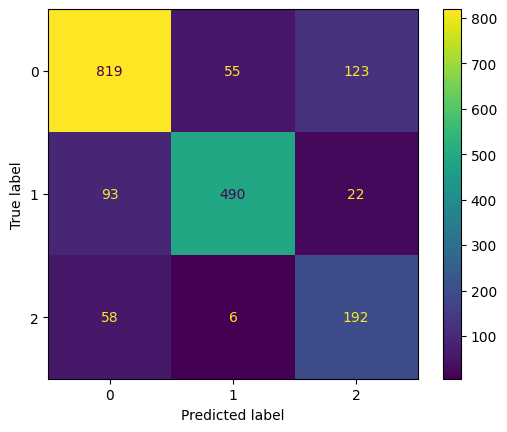

In [8]:
# Initialize and train model
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# model.score(X_train,y_train)
evaluate(y_test,y_pred)

In [9]:
coefficients = model.coef_[0]
feature_names = np.array(X_train.columns)

# Step 4: Sort features by absolute coefficient value
importance = np.abs(coefficients)
sorted_indices = importance.argsort()

# Step 5: Display the important features
important_features = feature_names[sorted_indices]
print("Important features (sorted):")
for feature in important_features:
    print(feature)

Important features (sorted):
citeStart
emerged_tfidf
bcar_tfidf
cut_tfidf
citeEnd
dense_tfidf
polymerase_tfidf
crosssectional_tfidf
frequency_tfidf
concluded_tfidf
et al ghalayini_tfidf
al ghalayini et_tfidf
al ghalayini_tfidf
ghalayini et al_tfidf
ghalayini et_tfidf
ghalayini_tfidf
marcobal et al_tfidf
marcobal et_tfidf
marcobal_tfidf
phrase_tfidf
queen_tfidf
circulation_tfidf
utilization_tfidf
theory_tfidf
abundant_tfidf
gay_tfidf
deterministic_tfidf
defining_tfidf
split_tfidf
corresponding_tfidf
du_tfidf
api_tfidf
impair_tfidf
marshall_tfidf
record_tfidf
executive_tfidf
labor_tfidf
glomus_tfidf
holmes_tfidf
system including_tfidf
expansion_tfidf
potential_tfidf
poorly_tfidf
detoxification_tfidf
coronal_tfidf
recipient_tfidf
al observed_tfidf
et al observed_tfidf
decision_tfidf
la_tfidf
basal_tfidf
excluding_tfidf
al sun_tfidf
al sun et_tfidf
et al sun_tfidf
ganges_tfidf
stability_tfidf
data set_tfidf
clinician_tfidf
parent_tfidf
specialist_tfidf
explicit_tfidf
atrial_tfidf
clark_tfi

Try permutation importance of log classifier

saved!
saved!


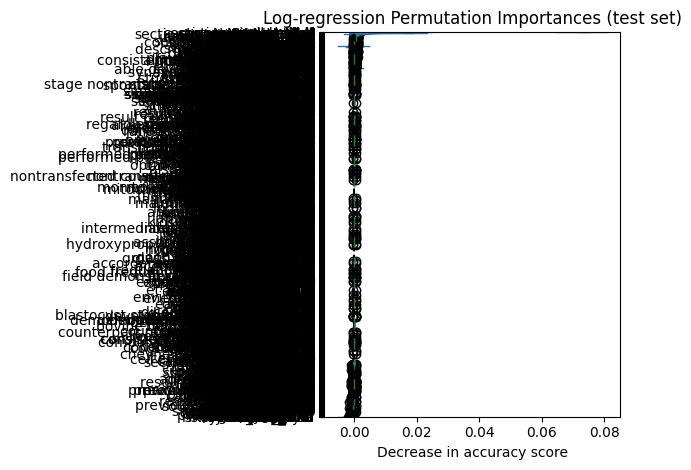

In [10]:
from sklearn.inspection import permutation_importance
log_result = permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42)
sorted_importances_idx = log_result.importances_mean.argsort()

save_result(save_log_path+"log_reg_sorted_importance_idx.pkl",sorted_importances_idx)
# sorted_importances_idx = load_result(save_log_path+"log_reg_sorted_importance_idx.pkl")

importances = pd.DataFrame(
    log_result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)

save_result(save_log_path+"log_reg_importances_df.pkl",sorted_importances_idx)
# sorted_importances_idx = load_result(save_log_path+"log_reg_importances_df.pkl")

head_importance = importances.head(10)
ax = head_importance.plot.box(vert=False, whis=10)
ax.set_title("Log-regression Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

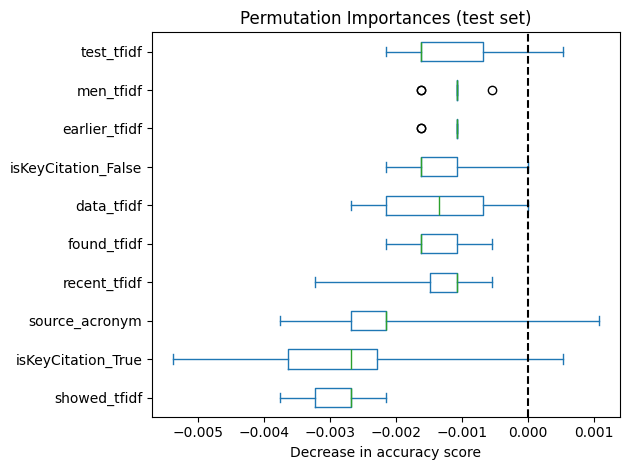

In [11]:
head_importance = importances.iloc[:, :10]

# Create a boxplot to visualize the permutation importances
ax = head_importance.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")  # Vertical line at 0 for reference
ax.set_xlabel("Decrease in accuracy score")

# Ensure the layout is tight
ax.figure.tight_layout()
plt.show()

## 4. Train Random Forest Classifier

              precision    recall  f1-score   support

           0    0.82698   0.84855   0.83762       997
           1    0.86146   0.80165   0.83048       605
           2    0.68382   0.72656   0.70455       256

    accuracy                        0.81647      1858
   macro avg    0.79075   0.79225   0.79088      1858
weighted avg    0.81848   0.81647   0.81696      1858



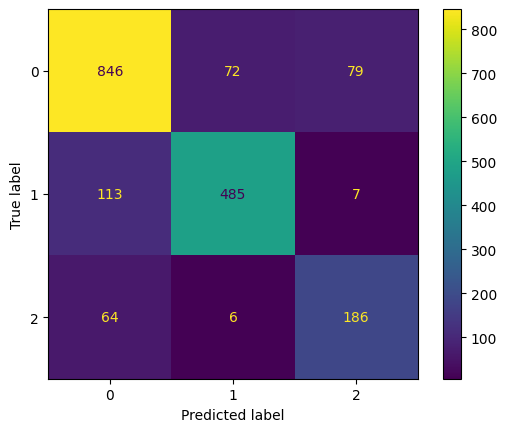

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
evaluate(y_test,y_pred_rf)

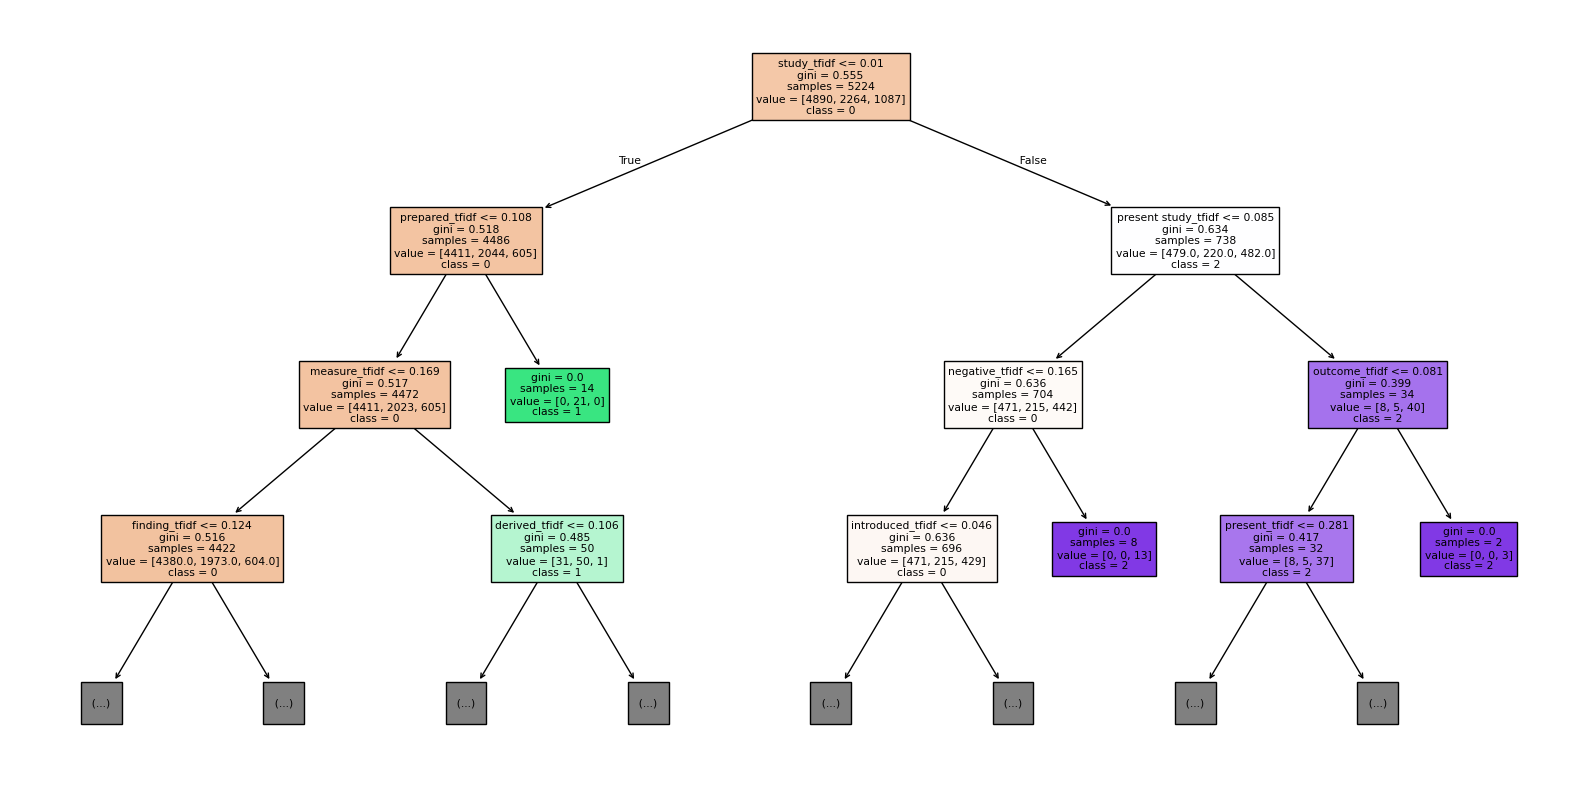

In [13]:
tree_index = 0
plt.figure(figsize=(20, 10))  # Adjust figure size for readability
class_names = [str(cls) for cls in rf_model.classes_]
class_names = class_names[0:5]
plot_tree(rf_model.estimators_[tree_index], feature_names=X_train.columns, class_names=class_names, filled=True, max_depth=3)
plt.show()

Extract Feature importance by impuritied based (misleading because of high cardinality features)
we have normal assumption that features are independent from each others

In [14]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Combine into a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [15]:
feature_importance_df

,Feature,Importance
13,sectionName_method,0.077945
3930,result_tfidf,0.033642
4788,using_tfidf,0.026293
11,sectionName_background,0.023166
14,sectionName_result,0.023068
...,...,...
816,chiang_tfidf,0.000000
1862,filament_tfidf,0.000000
639,bovine field_tfidf,0.000000
659,bridgman et_tfidf,0.000000


saved!
saved!


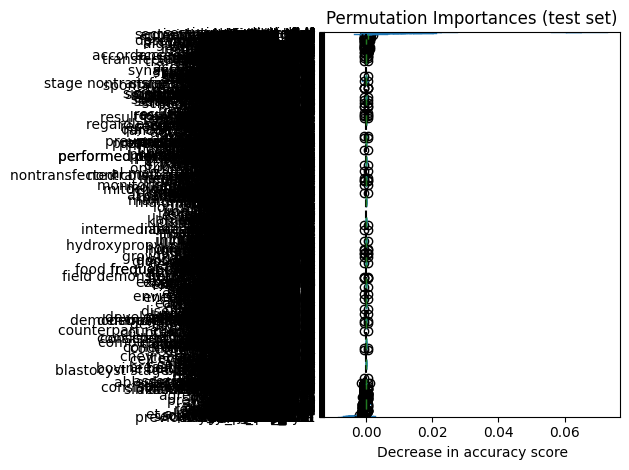

In [16]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_importances_idx = result.importances_mean.argsort()
save_result(save_log_path+"rf_sorted_importances_idx.pkl",sorted_importances_idx)
# sorted_importances_idx = load_result(save_log_path+"rf_sorted_importances_idx.pkl")
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)

save_result(save_log_path+"rf_importances_df.pkl",sorted_importances_idx)
# sorted_importances_idx = load_result(save_log_path+"rf_importances_df.pkl")

head_importance = importances.head(10)
ax = head_importance.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

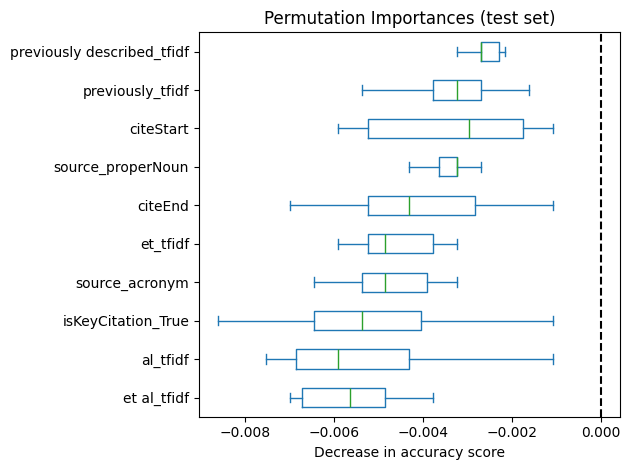

In [17]:
head_importance = importances.iloc[:, :10]

# Create a boxplot to visualize the permutation importances
ax = head_importance.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")  # Vertical line at 0 for reference
ax.set_xlabel("Decrease in accuracy score")

# Ensure the layout is tight
ax.figure.tight_layout()
plt.show()

In [18]:
# top_n = 15
# plt.figure(figsize=(10, 6))
# plt.barh(perm_df['feature'][:top_n][::-1], perm_df['importance_mean'][:top_n][::-1])
# plt.xlabel("Mean Decrease in Score")
# plt.title("Top Feature Importances (Permutation)")
# plt.tight_layout()
# plt.show()

NameError: name 'perm_df' is not defined

<Figure size 1000x600 with 0 Axes>

## 5. Train Support Vector Machine (SVM)

In [19]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


Try multi-colinear features importance

[Text(0, 0, 'develop_tfidf'),
 Text(0, 1, 'regardless_tfidf'),
 Text(0, 2, 'recent work_tfidf'),
 Text(0, 3, 'bovine_tfidf'),
 Text(0, 4, 'blastocyst_tfidf'),
 Text(0, 5, 'bhuiyan et al_tfidf'),
 Text(0, 6, 'bhuiyan_tfidf'),
 Text(0, 7, 'bhuiyan et_tfidf'),
 Text(0, 8, 'ear_tfidf'),
 Text(0, 9, 'transfected_tfidf'),
 Text(0, 10, 'counterpart_tfidf'),
 Text(0, 11, 'br_tfidf'),
 Text(0, 12, 'passage_tfidf'),
 Text(0, 13, 'br recent_tfidf'),
 Text(0, 14, 'early late_tfidf'),
 Text(0, 15, 'blastocyst stage_tfidf'),
 Text(0, 16, 'nontransfected_tfidf'),
 Text(0, 17, 'nontransfected counterpart_tfidf'),
 Text(0, 18, 'work bhuiyan et_tfidf'),
 Text(0, 19, 'work bhuiyan_tfidf'),
 Text(0, 20, 'transfected ear fibroblast_tfidf'),
 Text(0, 21, 'transfected ear_tfidf'),
 Text(0, 22, 'stage nontransfected counterpart_tfidf'),
 Text(0, 23, 'stage nontransfected_tfidf'),
 Text(0, 24, 'scnt bovine field_tfidf'),
 Text(0, 25, 'scnt bovine_tfidf'),
 Text(0, 26, 'scnt_tfidf'),
 Text(0, 27, 'regardless pa

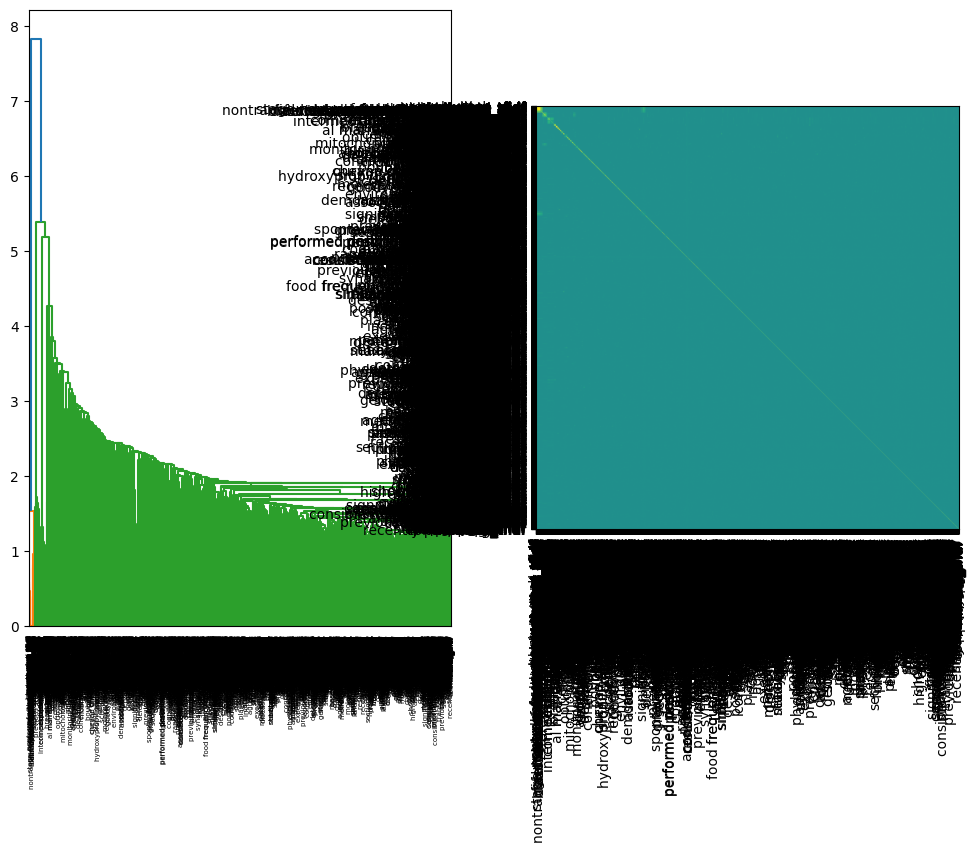

In [25]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr
import numpy as np


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X_train.columns.to_list(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])

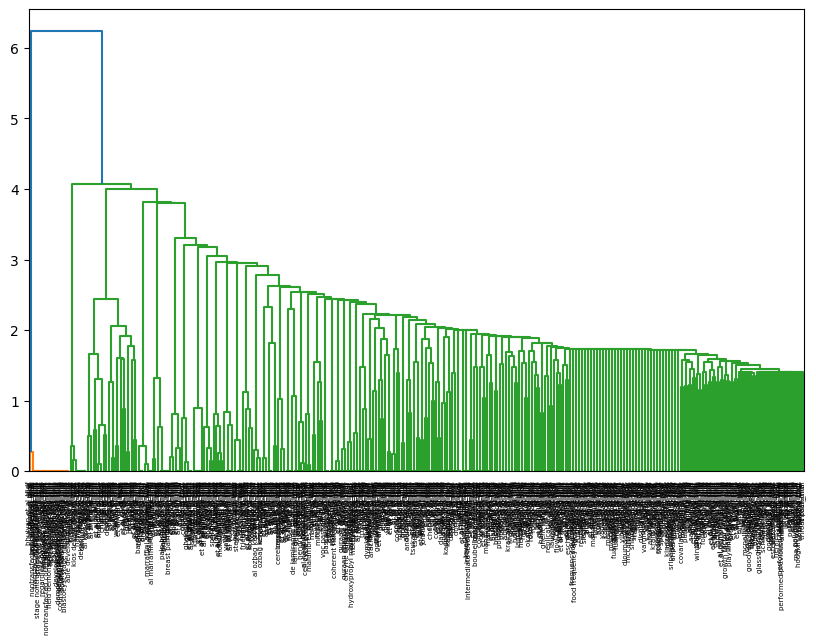

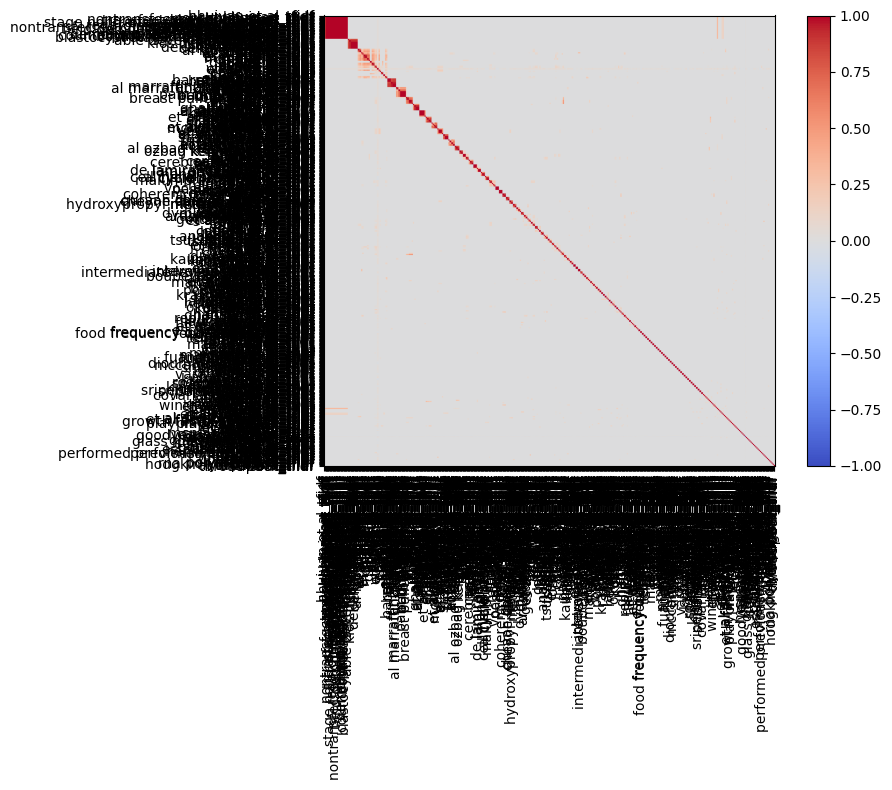

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

# Calculate Spearman correlation
corr = spearmanr(X_train).correlation

# Ensure the correlation matrix is symmetric with diagonal 1
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# === Step 1: Filter features with high absolute correlation ===
# Define a correlation threshold
correlation_threshold = 0.99

# Create a mask for pairs with high correlation (but not self-pairs)
mask = (np.abs(corr) > correlation_threshold) & (~np.eye(corr.shape[0], dtype=bool))

# Get columns that have at least one high correlation with others
high_corr_features_idx = np.where(mask.any(axis=0))[0]
high_corr_features = X_train.columns[high_corr_features_idx]

# Subset correlation matrix
corr_subset = corr[high_corr_features_idx, :][:, high_corr_features_idx]

# === Step 2: Perform hierarchical clustering on the filtered matrix ===
distance_matrix = 1 - np.abs(corr_subset)
dist_linkage = hierarchy.ward(squareform(distance_matrix))

# === Step 3: Plot dendrogram in its own figure ===
fig1, ax1 = plt.subplots(figsize=(10, 6))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=high_corr_features.tolist(), ax=ax1, leaf_rotation=90
)

# === Step 4: Plot reordered correlation matrix in a separate figure ===
fig2, ax2 = plt.subplots(figsize=(10, 8))

# Reorder correlation matrix
leaves = dendro["leaves"]
reordered_corr = corr_subset[leaves, :][:, leaves]

# Show correlation matrix
cax = ax2.imshow(reordered_corr, cmap="coolwarm", vmin=-1, vmax=1)
fig2.colorbar(cax)

# Set axis labels
ax2.set_xticks(np.arange(len(leaves)))
ax2.set_yticks(np.arange(len(leaves)))
ax2.set_xticklabels(np.array(high_corr_features)[leaves], rotation=90)
ax2.set_yticklabels(np.array(high_corr_features)[leaves])

plt.tight_layout()
plt.show()

In [ ]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
    # cut redundancy from the tree
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features_names = X_train.columns[selected_features]

X_train_sel = X_train[selected_features_names]
X_test_sel = X_test[selected_features_names]

print("multi-collinear-selected-featurename\n",selected_features_names)
save_result(save_log_path+"multi-collinear-selected_featurename.pkl",selected_features_names)

clf_sel = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sel.fit(X_train_sel, y_train)
print(
    "Baseline accuracy on test data with features removed:"
    f" {clf_sel.score(X_test_sel, y_test):.2}"
)

multi-collinear-selected-featurename
 Index(['citeEnd', 'excerpt_index', 'source_acronym', 'source_acronymParen',
       'source_andPhrase', 'source_etAlPhrase', 'sectionName_background',
       'sectionName_conclusion', 'aa_tfidf', 'ab_tfidf',
       ...
       'used_tfidf', 'variance_tfidf', 'vitro_tfidf', 'well_tfidf',
       'west_tfidf', 'widely_tfidf', 'worley_tfidf', 'wu_tfidf', 'xu_tfidf',
       'young_tfidf'],
      dtype='object', length=1498)
saved!
Baseline accuracy on test data with features removed: 0.71


saved!
saved!


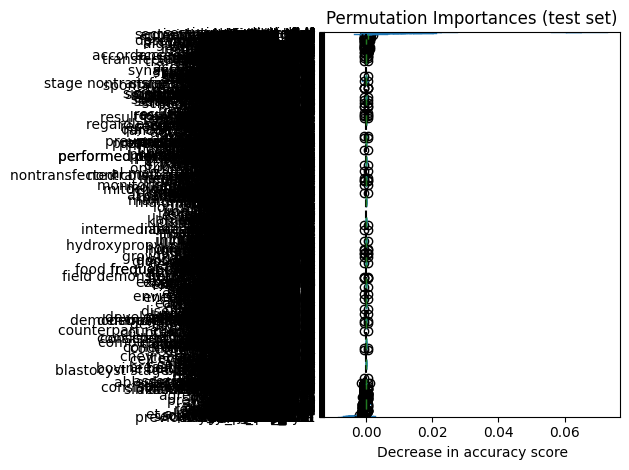

In [ ]:
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_importances_idx = result.importances_mean.argsort()
save_result(save_log_path+"rf_sorted_importances_idx.pkl",sorted_importances_idx)
# sorted_importances_idx = load_result(save_log_path+"rf_sorted_importances_idx.pkl")
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)

save_result(save_log_path+"rf_importances_df.pkl",sorted_importances_idx)
# sorted_importances_idx = load_result(save_log_path+"rf_importances_df.pkl")

head_importance = importances.head(10)
ax = head_importance.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [31]:
sorted_importances_idx = load_result(save_log_path+"rf_sorted_importances_idx.pkl")

loaded!


In [41]:
sorted_importances_idx = sorted_importances_idx[::-1][0:9]

In [42]:
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
# head_importance = importances
# ax = head_importance.plot.box(vert=False, whis=10)
# ax.set_title("Permutation Importances (test set)")
# ax.axvline(x=0, color="k", linestyle="--")
# ax.set_xlabel("Decrease in accuracy score")
# ax.figure.tight_layout()

In [43]:
importances

,sectionName_method,sectionName_result,result_tfidf,using_tfidf,used_tfidf,method_tfidf,excerpt_index,consistent_tfidf,sectionName_background
0,0.061356,0.027449,0.012917,0.016685,0.012379,0.006997,0.001076,0.004844,0.004844
1,0.065124,0.018837,0.020452,0.012917,0.011841,0.010226,0.011302,0.005920,0.005382
2,0.057051,0.022605,0.015070,0.014532,0.008073,0.005382,-0.000538,0.004844,0.006997
3,0.060280,0.020990,0.013994,0.013994,0.011302,0.007535,0.009688,0.005382,0.004306
4,0.060818,0.017223,0.019376,0.011302,0.011841,0.004306,0.009688,0.003767,0.002691
5,0.064586,0.022605,0.020452,0.009150,0.008073,0.006997,0.007535,0.005920,0.000000
6,0.072659,0.025296,0.015608,0.010226,0.006997,0.006459,0.005382,0.005382,0.004844
7,0.065124,0.020452,0.020990,0.011302,0.009150,0.003229,0.009688,0.004844,0.004844
8,0.064586,0.020990,0.019376,0.011302,0.006459,0.004306,0.004306,0.004306,0.004306
9,0.055974,0.018837,0.012917,0.008073,0.009150,0.006459,0.003767,0.004844,0.004306
